In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy
from functools import partial
import seaborn

In [2]:
def pos(x):
    
    y = x.copy()
    y[x > 0] = x[x > 0]
    y[x <=0] = 0
    
    return y

In [3]:
def final_basis(i, x, h, N, x_0):
    
    if i == 0:
        f = np.zeros_like(x)
        
        a = (1-x/h)**3 + (2-x/h)/2*((2-x/h)*(x/h-0)/2+(x/h-0)*(1-x/h)) + (x/h-0)*(1-x/h)**2
        b = (2-x/h)**3/((2-0)*(2-0)*(2-1))
        
        f[(0 <= x/h) & (x/h <= 1)] = a[(0 <= x/h) & (x/h <= 1)]
        f[(1 <= x/h) & (x/h <= 2)] = b[(1 <= x/h) & (x/h <= 2)]
        return f
    
    elif i == 1:
        f = np.zeros_like(x)
        
        a = (3-x/h)*(x/h-0)**2/6 + (x/h-0)/2*((2-x/h)*(x/h-0)/2+(x/h-0)*(1-x/h))
        b = (3-x/h)/3*((3-x/h)*(x/h-1)/2 + (x/h-0)*(2-x/h)/2) + (x/h-0)*(2-x/h)**2/4
        c = (3-x/h)**3/6
        
        f[(0 <= x/h) & (x/h <= 1)] = a[(0 <= x/h) & (x/h <= 1)]
        f[(1 <= x/h) & (x/h <= 2)] = b[(1 <= x/h) & (x/h <= 2)]        
        f[(2 <= x/h) & (x/h <= 3)] = c[(2 <= x/h) & (x/h <= 3)]        
        
        return f
    
    elif (i == N - 1) or (i == -1):
        t = x.max() - x
        tmp = final_basis(0, t, h, N, x_0)        
        return tmp
    
    elif (i == N - 2) or (i == -2):
        t = x.max() - x
        tmp = final_basis(1, t, h, N, x_0)
        return tmp
    
    elif (2 <= i <= N-3):
        a =   pos((x-x_0)/h - (i - 2))**3
        b = 4*pos((x-x_0)/h - (i - 1))**3
        c = 6*pos((x-x_0)/h - (i - 0))**3
        d = 4*pos((x-x_0)/h - (i + 1))**3
        e =   pos((x-x_0)/h - (i + 2))**3

        f = 0.25 * (a - b + c - d + e)
        
        return f
    
    else:
        raise ValueError()

In [4]:
def final_basis_normal(i, x, h, N, x_0):
    
    if (0 <= i <= N-1):
        a =   pos((x-x_0)/h - (i - 2))**3
        b = 4*pos((x-x_0)/h - (i - 1))**3
        c = 6*pos((x-x_0)/h - (i - 0))**3
        d = 4*pos((x-x_0)/h - (i + 1))**3
        e =   pos((x-x_0)/h - (i + 2))**3

        f = 0.25 * (a - b + c - d + e)

        if i == 0:
            f += pos(1 - (x - x_0)/h)**3/4
        
        if i == (N - 1):
            f += pos((x - x_0)/h - (N-2))**3/4
        
        f[x < x0] = 0
        f[x > (x_0 + (N - 1)*h)] = 0
        
    else:
        raise IndexError(f"Invalid index {i}")
        
    return f

In [5]:
x0 = 0
N = 4
X, h = np.linspace(x0, 3, N, retstep=True)
x = np.linspace(x0, 3, 1000)

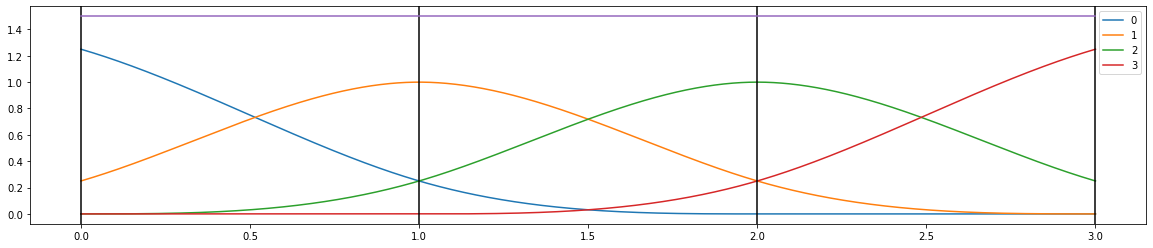

In [6]:
fig, ax = plt.subplots(figsize=(20, 4))
f = np.zeros_like(x)

for j in range(0, N):
    ax.plot(x, final_basis_normal(j, x, h, N, x0))
    f += final_basis_normal(j, x, h, N, x0)

for xx in X:
    ax.axvline(x=xx, color="black")

ax.plot(x, f)
ax.legend([f"{j}" for j in range(N)])
plt.show()

# New way

In [7]:
Y = np.sin(X)

In [8]:
n_points = X.shape[0]
matrix = np.zeros((n_points, n_points))
matrix += np.eye(n_points) + 0.25 * np.eye(n_points, k=1) + 0.25 *np.eye(n_points, k=-1)

In [9]:
matrix[+0, +0] = 1.25
matrix[-1, -1] = 1.25

In [10]:
c = np.linalg.solve(matrix, Y)

In [11]:
f_bar = np.zeros_like(x)

for j in range(n_points):
    f_bar += c[j] * final_basis_normal(j, x, h, N, x0)

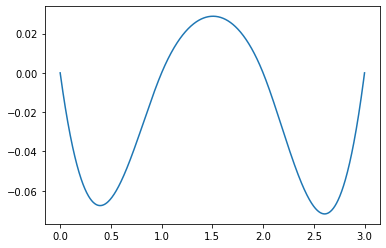

In [12]:
fig, ax = plt.subplots()
ax.plot(x, f_bar-np.sin(x))
plt.show()

# Single basis

In [13]:
IX, IY = np.meshgrid(X, X, indexing="ij")

In [14]:
IZ = np.sin(IX)*np.cos(IY)

In [15]:
xx, yy = np.meshgrid(x, x, indexing="ij")
zz = np.zeros_like(xx)

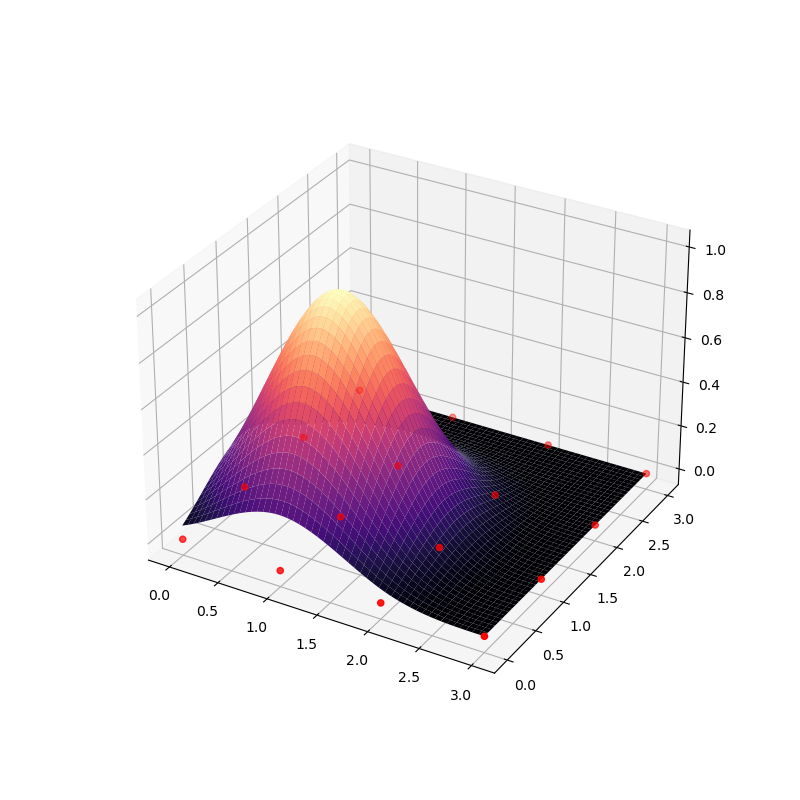

In [16]:
%matplotlib widget
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
zz = np.outer(final_basis_normal(1, x, h, N, x0),
              final_basis_normal(1, x, h, N, x0))
ax.plot_surface(xx, yy, zz, cmap='magma')
ax.scatter(IX, IY, IZ*0, color="red")
plt.show()

In [17]:
x0 = 0
N = 10
X, h = np.linspace(x0, 3, N, retstep=True)
x = np.linspace(x0, 3, 100)

In [18]:
IX, IY = np.meshgrid(X, X, indexing="ij")
IZ = np.sin(IX)*np.cos(IY)

In [19]:
n_points = X.shape[0]
b = IZ.flatten()
matrix = numpy.zeros((n_points**2, n_points**2), dtype=numpy.float32)

In [20]:
for i in range(n_points**2):
    idx = numpy.unravel_index(i, (n_points, n_points))
    tmp = np.zeros((n_points, n_points))
    
    tmp[idx] = 1
    
    #Multiply edges by 1.25
    if (idx[0] == 0): 
        tmp[idx] *= 1.25
    if (idx[1] == 0):
        tmp[idx] *= 1.25
    if (idx[0] == n_points-1):
        tmp[idx] *= 1.25
    if (idx[1] == n_points-1):
        tmp[idx] *= 1.25
    
    if idx[0]+1 <= n_points-1:
        tmp[idx[0]+1, idx[1]] = 1/4
    
    if idx[1]+1 <= n_points-1:
        tmp[idx[0], idx[1]+1] = 1/4
    
    if idx[0]-1 >= 0:
        tmp[idx[0]-1, idx[1]] = 1/4
        
    if idx[1]-1 >= 0:
        tmp[idx[0], idx[1]-1] = 1/4
    
    if (idx[0]+1 <= n_points-1) and (idx[1]+1 <= n_points-1):
        tmp[idx[0]+1, idx[1]+1] = 1/16
    
    if (idx[0]+1 <= n_points-1) and (idx[1]-1 >= 0):
        tmp[idx[0]+1, idx[1]-1] = 1/16
    
    if (idx[0]-1 >= 0) and (idx[1]-1 >= 0):
        tmp[idx[0]-1, idx[1]-1] = 1/16
        
    if (idx[0]-1 >= 0) and (idx[1]+1 <= n_points-1):
        tmp[idx[0]-1, idx[1]+1] = 1/16
        
    #Multiply edge line's by 1.25
    if (idx[0] == 0) or (idx[0] == n_points - 1):
        if idx[1] + 1 <= n_points - 1:
            tmp[idx[0], idx[1] + 1] *= 1.25
        if idx[1] - 1 >= 0:
            tmp[idx[0], idx[1] - 1] *= 1.25

    if (idx[1] == 0) or (idx[1] == n_points - 1):
        if idx[0] + 1 <= n_points - 1:
            tmp[idx[0] + 1, idx[1]] *= 1.25
        if idx[0] - 1 >= 0:
            tmp[idx[0] - 1, idx[1]] *= 1.25
            
    matrix[i] = tmp.flatten()

In [21]:
c = np.linalg.solve(matrix, b)

# Plot

In [22]:
xx, yy = np.meshgrid(x, x, indexing="ij")
zz = np.zeros_like(xx)

In [23]:
for i in range(0, IX.shape[0]):
    for j in range(0, IY.shape[0]):
        
        x_part = final_basis_normal(i, x, h, N, x0)
        y_part = final_basis_normal(j, x, h, N, x0)
        
        zz = zz + c[i*(n_points)+j] * np.outer(x_part, y_part)

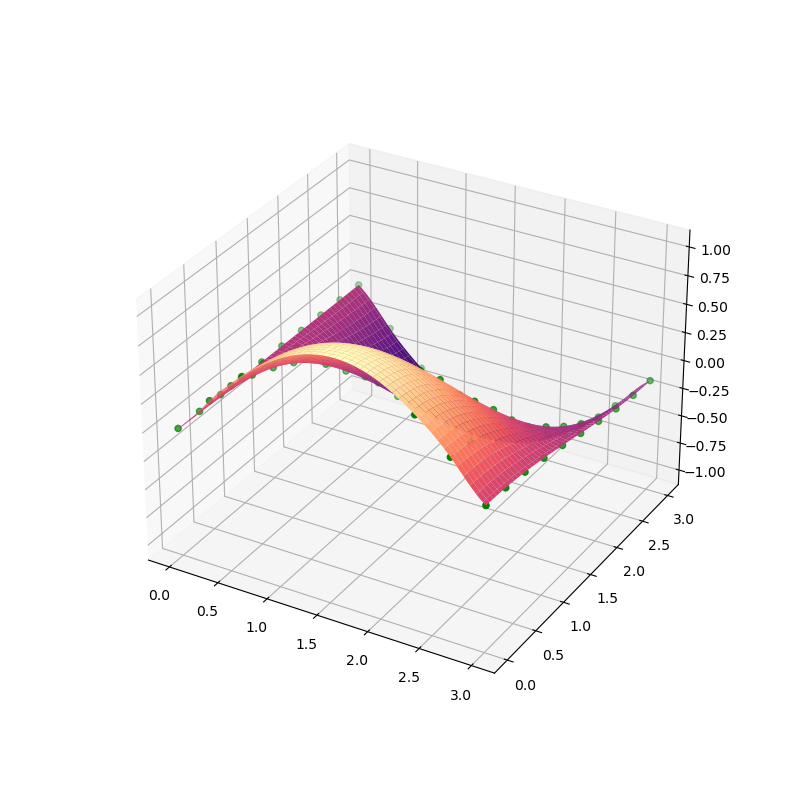

In [24]:
%matplotlib widget
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')

ax.plot_surface(xx, yy, zz, cmap='magma')
# ax.set_zlim(0, 3)

ax.scatter(IX, IY, IZ, color="green")
plt.show()

# Main part of the solution

In [25]:
x0 = 0
xN = 10
N = 10
X, h = np.linspace(x0, xN, N, retstep=True)
x =    np.linspace(x0, xN, 1000)
IX, IY = np.meshgrid(X, X, indexing="ij")
n_points = X.shape[0]
matrix = numpy.zeros((n_points**2, n_points**2))
b = np.zeros(n_points**2)
f = np.ones_like(IX)

# Computed integrals

In [26]:
x_axis_xx = np.array([3/8/h**3, 0, -27/8/h**3, 6/h**3, -27/8/h**3, 0, 3/8/h**3])
y_axis_xx = np.array([h/2240, 3/56*h, 1991/2240*h, 151/140*h, 1991/2240*h, 3/56*h, h/2240])

x_axis_xx_3 = np.array([3/8/h**3, 0, -27/8/h**3, 6/h**3, -27/8/h**3, 0, 3/8/h**3])
y_axis_xx_3 = np.array([h/2240, 3/56*h, 1991/2240*h, 151/140*h, 1991/2240*h, 3/56*h, h/2240])

x_axis_xx_2 = np.array([3/8/h**3, -27/8/h**3, 6/h**3, -27/8/h**3, 0, 3/8/h**3])
y_axis_xx_2 = np.array([121/2240*h, 1991/2240*h, 151/140*h, 1991/2240*h, 3/56*h, h/2240])

x_axis_xx_1 = np.array([-9/4/h**3, 21/4/h**3, -27/8/h**3, 0, 3/8/h**3])
y_axis_xx_1 = np.array([561/1120*h, 599/560*h, 1991/2240*h, 3/56*h, h/2240])

x_axis_xx_0 = np.array([3/2/h**3, -9/4/h**3, 3/8/h**3, 3/8/h**3])
y_axis_xx_0 = np.array([743/1120*h, 561/1120*h, 121/2240*h, 1/2240*h])

In [27]:
y_axis_yy = np.array([3/8/h**3, 0, -27/8/h**3, 6/h**3, -27/8/h**3, 0, 3/8/h**3])
x_axis_yy = np.array([h/2240, 3/56*h, 1991/2240*h, 151/140*h, 1991/2240*h, 3/56*h, h/2240])

y_axis_yy_3 = np.array([3/8/h**3, 0, -27/8/h**3, 6/h**3, -27/8/h**3, 0, 3/8/h**3])
x_axis_yy_3 = np.array([h/2240, 3/56*h, 1991/2240*h, 151/140*h, 1991/2240*h, 3/56*h, h/2240])

y_axis_yy_2 = np.array([3/8/h**3, -27/8/h**3, 6/h**3, -27/8/h**3, 0, 3/8/h**3])
x_axis_yy_2 = np.array([121/2240*h, 1991/2240*h, 151/140*h, 1991/2240*h, 3/56*h, h/2240])

y_axis_yy_1 = np.array([-9/4/h**3, 21/4/h**3, -27/8/h**3, 0, 3/8/h**3])
x_axis_yy_1 = np.array([561/1120*h, 599/560*h, 1991/2240*h, 3/56*h, h/2240])

y_axis_yy_0 = np.array([3/2/h**3, -9/4/h**3, 3/8/h**3, 3/8/h**3])
x_axis_yy_0 = np.array([743/1120*h, 561/1120*h, 121/2240*h, 1/2240*h])

In [28]:
x_axis_xy = np.array([-3/160/h, -9/20/h, -9/32/h, 3/2/h, -9/32/h, -9/20/h, -3/160/h])
y_axis_xy = np.array([-3/160/h, -9/20/h, -9/32/h, 3/2/h, -9/32/h, -9/20/h, -3/160/h])

x_axis_xy_3 = np.array([-3/160/h, -9/20/h, -9/32/h, 3/2/h, -9/32/h, -9/20/h, -3/160/h])
y_axis_xy_3 = np.array([-3/160/h, -9/20/h, -9/32/h, 3/2/h, -9/32/h, -9/20/h, -3/160/h])

x_axis_xy_2 = np.array([-15/32/h, -9/32/h, 3/2/h, -9/32/h, -9/20/h, -3/160/h])
y_axis_xy_2 = np.array([-15/20/h, -9/32/h, 3/2/h, -9/32/h, -9/20/h, -3/160/h])

x_axis_xy_1= np.array([-51/80/h, 111/80/h, -9/32/h, -9/20/h, -3/160/h])
y_axis_xy_1= np.array([-51/80/h, 111/80/h, -9/32/h, -9/20/h, -3/160/h])

x_axis_xy_0 = np.array([9/8/h, -51/80/h, -15/32/h, -3/160/h])
y_axis_xy_0 = np.array([9/8/h, -51/80/h, -15/32/h, -3/160/h])

In [29]:
for i in range(n_points**2):
    idx = numpy.unravel_index(i, (n_points, n_points))
    tmp = np.zeros((n_points, n_points))

    #Dirichlet boundary conditions
    if (idx[0] == 0) or (idx[1] == 0) or (idx[0] == n_points-1) or (idx[1] == n_points-1):
        tmp[idx] = 1

        if (idx[0] == 0): 
            tmp[idx] *= 1.25
        if (idx[1] == 0):
            tmp[idx] *= 1.25
        if (idx[0] == n_points-1):
            tmp[idx] *= 1.25
        if (idx[1] == n_points-1):
            tmp[idx] *= 1.25

        if idx[0]+1 <= n_points-1:
            tmp[idx[0]+1, idx[1]] = 1/4

        if idx[1]+1 <= n_points-1:
            tmp[idx[0], idx[1]+1] = 1/4

        if idx[0]-1 >= 0:
            tmp[idx[0]-1, idx[1]] = 1/4

        if idx[1]-1 >= 0:
            tmp[idx[0], idx[1]-1] = 1/4

        if (idx[0]+1 <= n_points-1) and (idx[1]+1 <= n_points-1):
            tmp[idx[0]+1, idx[1]+1] = 1/16

        if (idx[0]+1 <= n_points-1) and (idx[1]-1 >= 0):
            tmp[idx[0]+1, idx[1]-1] = 1/16

        if (idx[0]-1 >= 0) and (idx[1]-1 >= 0):
            tmp[idx[0]-1, idx[1]-1] = 1/16

        if (idx[0]-1 >= 0) and (idx[1]+1 <= n_points-1):
            tmp[idx[0]-1, idx[1]+1] = 1/16

        #Multiply edge line's by 1.25
        if (idx[0] == 0) or (idx[0] == n_points - 1):
            if idx[1] + 1 <= n_points - 1:
                tmp[idx[0], idx[1] + 1] *= 1.25
            if idx[1] - 1 >= 0:
                tmp[idx[0], idx[1] - 1] *= 1.25

        if (idx[1] == 0) or (idx[1] == n_points - 1):
            if idx[0] + 1 <= n_points - 1:
                tmp[idx[0] + 1, idx[1]] *= 1.25
            if idx[0] - 1 >= 0:
                tmp[idx[0] - 1, idx[1]] *= 1.25

        matrix[i] = tmp.flatten()
        b[i] = 0
        continue

    #Neuman boundary conditions
    if (idx[0] == 1) or (idx[1] == 1) or (idx[0] == n_points-2) or (idx[1] == n_points-2):
        
        if idx[0] == 1:
            if 1 <= idx[1] <= n_points - 2:
                tmp[0, idx[1]] = (-1) * (3/4/h)
                tmp[1, idx[1]] = (+1) * (3/4/h)
                
                tmp[0, idx[1]-1] =  (1/4) * (3/4/h)
                tmp[1, idx[1]-1] =  (1/4) * (3/4/h)
                tmp[0, idx[1]+1] =  (1/4) * (3/4/h)
                tmp[1, idx[1]+1] =  (1/4) * (3/4/h)
            else:
                tmp[0, idx[1]] = (-9/4) * (3/4/h)
                tmp[1, idx[1]] = (+1/4) * (3/4/h)
        
        if idx[0] == n_points - 2:
            if 1 <= idx[1] <= n_points - 2:
                tmp[n_points-1, idx[1]] = (-1) * (3/4/h)
                tmp[n_points-2, idx[1]] = (+1) * (3/4/h)
                
                tmp[n_points-1, idx[1]-1] =  (1/4) * (3/4/h)
                tmp[n_points-2, idx[1]-1] =  (1/4) * (3/4/h)
                tmp[n_points-1, idx[1]+1] =  (1/4) * (3/4/h)
                tmp[n_points-2, idx[1]+1] =  (1/4) * (3/4/h)
            else:
                tmp[n_points-1, idx[1]] = (-9/4) * (3/4/h)
                tmp[n_points-2, idx[1]] = (+1/4) * (3/4/h)
        
        if idx[1] == 1:
            if 1 <= idx[0] <= n_points - 2:
                tmp[idx[0], 0] = (-1) * (3/4/h)
                tmp[idx[0], 1] = (+1) * (3/4/h)
                
                tmp[idx[0]-1, 0] =  (1/4) * (3/4/h)
                tmp[idx[0]-1, 1] =  (1/4) * (3/4/h)
                tmp[idx[0]+1, 0] =  (1/4) * (3/4/h)
                tmp[idx[0]+1, 1] =  (1/4) * (3/4/h)
            else:
                tmp[idx[0], 0] = (-9/4) * (3/4/h)
                tmp[idx[0], 1] = (+1/4) * (3/4/h)

        if idx[1] == n_points - 2:
            if 1 <= idx[0] <= n_points - 2:
                tmp[idx[0], n_points-1] = (-1) * (3/4/h)
                tmp[idx[0], n_points-2] = (+1) * (3/4/h)

                tmp[idx[0]-1, n_points-1] =  (1/4) * (3/4/h)
                tmp[idx[0]-1, n_points-2] =  (1/4) * (3/4/h)
                tmp[idx[0]+1, n_points-1] =  (1/4) * (3/4/h)
                tmp[idx[0]+1, n_points-2] =  (1/4) * (3/4/h)
            else:
                tmp[idx[0], n_points-1] = - (9/4) * (3/4/h)
                tmp[idx[0], n_points-2] = + (1/4) * (3/4/h)

        matrix[i] = tmp.flatten()
        b[i] = 0
        continue

    #for x axis
    if idx[1] == 0:
        XX_x = x_axis_xx_0
        YY_x = x_axis_yy_0
        XY_x = x_axis_xy_0
        offset_x = 0
    elif idx[1] == 1:
        XX_x = x_axis_xx_1
        YY_x = x_axis_yy_1
        XY_x = x_axis_xy_1
        offset_x = 1
    elif idx[1] == 2:
        XX_x = x_axis_xx_2
        YY_x = x_axis_yy_2
        XY_x = x_axis_xy_2
        offset_x = 2
    elif idx[1] == 3:
        XX_x = x_axis_xx_3
        YY_x = x_axis_yy_3
        XY_x = x_axis_xy_3
        offset_x = 3
    elif idx[1] == n_points - 4:
        XX_x = x_axis_xx_3[::-1]
        YY_x = x_axis_yy_3[::-1]
        XY_x = x_axis_xy_3[::-1]
        offset_x = -3 + XY_x.shape[0] - 1
    elif idx[1] == n_points - 3:
        XX_x = x_axis_xx_2[::-1]
        YY_x = x_axis_yy_2[::-1]
        XY_x = x_axis_xy_2[::-1]
        offset_x = -2 + XY_x.shape[0] - 1
    elif idx[1] == n_points - 2:
        XX_x = x_axis_xx_1[::-1]
        YY_x = x_axis_yy_1[::-1]
        XY_x = x_axis_xy_1[::-1]
        offset_x = -1 + XY_x.shape[0] - 1
    elif idx[1] == n_points - 1:
        XX_x = x_axis_xx_0[::-1]
        YY_x = x_axis_yy_0[::-1]
        XY_x = x_axis_xy_0[::-1]
        offset_x = 0 + XY_x.shape[0] - 1
    else:
        XX_x = x_axis_xx
        YY_x = x_axis_yy
        XY_x = x_axis_xy
        offset_x = 3

    #for y axis
    if idx[0] == 0:
        XX_y = y_axis_xx_0
        YY_y = y_axis_yy_0
        XY_y = y_axis_xy_0
        offset_y = 0
    elif idx[0] == 1:
        XX_y = y_axis_xx_1
        YY_y = y_axis_yy_1
        XY_y = y_axis_xy_1
        offset_y = 1
    elif idx[0] == 2:
        XX_y = y_axis_xx_2
        YY_y = y_axis_yy_2
        XY_y = y_axis_xy_2
        offset_y = 2
    elif idx[0] == 3:
        XX_y = y_axis_xx_3
        YY_y = y_axis_yy_3
        XY_y = y_axis_xy_3
        offset_y = 3
    elif idx[0] == n_points - 4:
        XX_y = y_axis_xx_3[::-1]
        YY_y = y_axis_yy_3[::-1]
        XY_y = y_axis_xy_3[::-1]
        offset_y = -3 + XY_y.shape[0] - 1
    elif idx[0] == n_points - 3:
        XX_y = y_axis_xx_2[::-1]
        YY_y = y_axis_yy_2[::-1]
        XY_y = y_axis_xy_2[::-1]
        offset_y = -2 + XY_y.shape[0] - 1
    elif idx[0] == n_points - 2:
        XX_y = y_axis_xx_1[::-1]
        YY_y = y_axis_yy_1[::-1]
        XY_y = y_axis_xy_1[::-1]
        offset_y = -1 + XY_y.shape[0] - 1
    elif idx[0] == n_points - 1:
        XX_y = y_axis_xx_0[::-1]
        YY_y = y_axis_yy_0[::-1]
        XY_y = y_axis_xy_0[::-1]
        offset_y = 0 + XY_y.shape[0] - 1
    else:
        XX_y = y_axis_xx
        YY_y = y_axis_yy
        XY_y = y_axis_xy
        offset_y = 3
    
    first = 2 *  np.outer(XX_y, XX_x)
    second = 4 * np.outer(XY_y, XY_x)
    third = 2 *  np.outer(YY_y, YY_x)
    
    val = first + second + third
    tmp[idx[0] - offset_y: (idx[0] + first.shape[0] - offset_y), 
        idx[1] - offset_x: (idx[1] + first.shape[1] - offset_x)] = val
    
    matrix[i] = tmp.flatten()
    b[i] = - 2 * 9/4 * h**2
    
    edges = (f[idx[0]-1, idx[1]-1] + f[idx[0]+1, idx[1]+1] +\
            f[idx[0]-1, idx[1]+1] + f[idx[0]+1, idx[1]-1])/16
    
    neigh = (f[idx[0]-1, idx[1]] + f[idx[0]+1, idx[1]]+\
            f[idx[0], idx[1]-1] + f[idx[0], idx[1]+1])/4
    
    b[i] = - 2 * (edges + 4 * neigh + 16 * f[idx]) * (h**2)/36

In [30]:
C = np.linalg.solve(matrix, b)

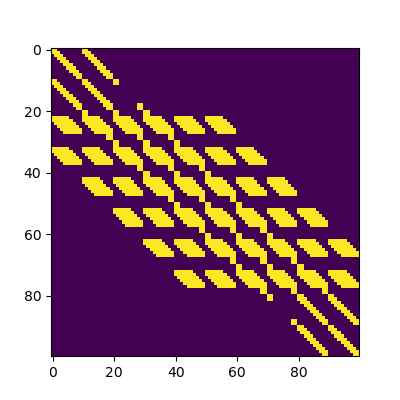

In [31]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow((matrix != 0))
plt.show()

In [32]:
xx, yy = np.meshgrid(x, x, indexing="ij")
zz = np.zeros_like(xx)

In [33]:
for i in range(0, IX.shape[0]):
    for j in range(0, IY.shape[0]):
        x_part = final_basis_normal(i, x, h, N, x0)
        y_part = final_basis_normal(j, x, h, N, x0)
        zz = zz + C[i*(n_points)+j] * np.outer(y_part, x_part)

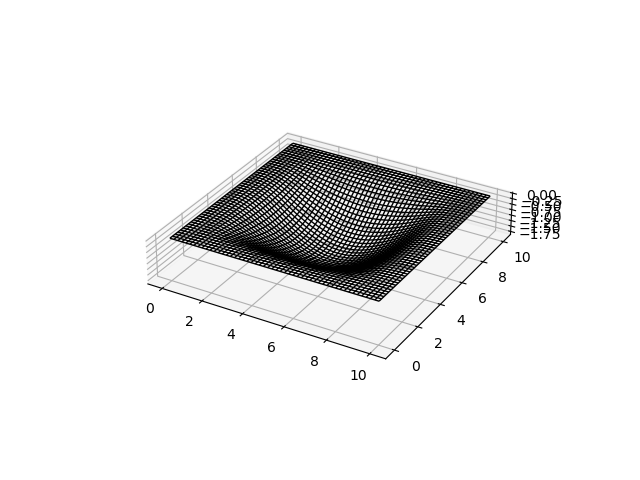

In [34]:
%matplotlib widget
ax = plt.axes(projection='3d')
ax.set_box_aspect((np.ptp(xx), np.ptp(yy), np.ptp(zz)))
ax.plot_wireframe(xx, yy, zz, color="black", lw=1)
plt.show()